In [30]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import pytesseract
import cv2

# Preprocessing

In [2]:
dataset_sel = pd.read_csv('OFF_dataset.csv')

In [35]:
dataset_sel.head(10)

numero  tableau  orientation  nb_col  surface_plane  floue  lisible  \
0        38        1            1     3.0              1      0        1   
1     18210        1            1     2.0              1      0        1   
2  20224776        1            1     2.0              1      1        1   
3  20225513        1            1     2.0              1      0        1   
4  20224752        1            1     2.0              0      0        1   
5  20223984        1            1     2.0              1      1        1   
6  20223236        1            1     4.0              1      0        1   
7  20223151        1            1     4.0              1      0        1   
8  20221140        1            1     4.0              0      0        1   
9  20221027        1            1     2.0              1      0        1   

   lumiere  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        1  
8        0  
9        0

In [4]:
def preprocessing_df(data):
    data = data.iloc[2:]
    data['numero'] = data['numero'].astype('str')
    data['nom_photo_cropped'] = data['numero'] + '.nutrition.cropped.jpg'
    data['nom_info_nutr'] = data['numero'] + '.nutrition.json'
    return data

In [5]:
def get_image_list(df) :
    image_list = []
    for image in df['nom_photo_cropped'] :
        filename = './full_data/'+ image
        im = Image.open(filename)
        image_list.append(im)
    return image_list

In [6]:
df = preprocessing_df(dataset_sel)

/Users/nicolaspeltre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nicolaspeltre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nicolaspeltre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [7]:
image_list = get_image_list(df)

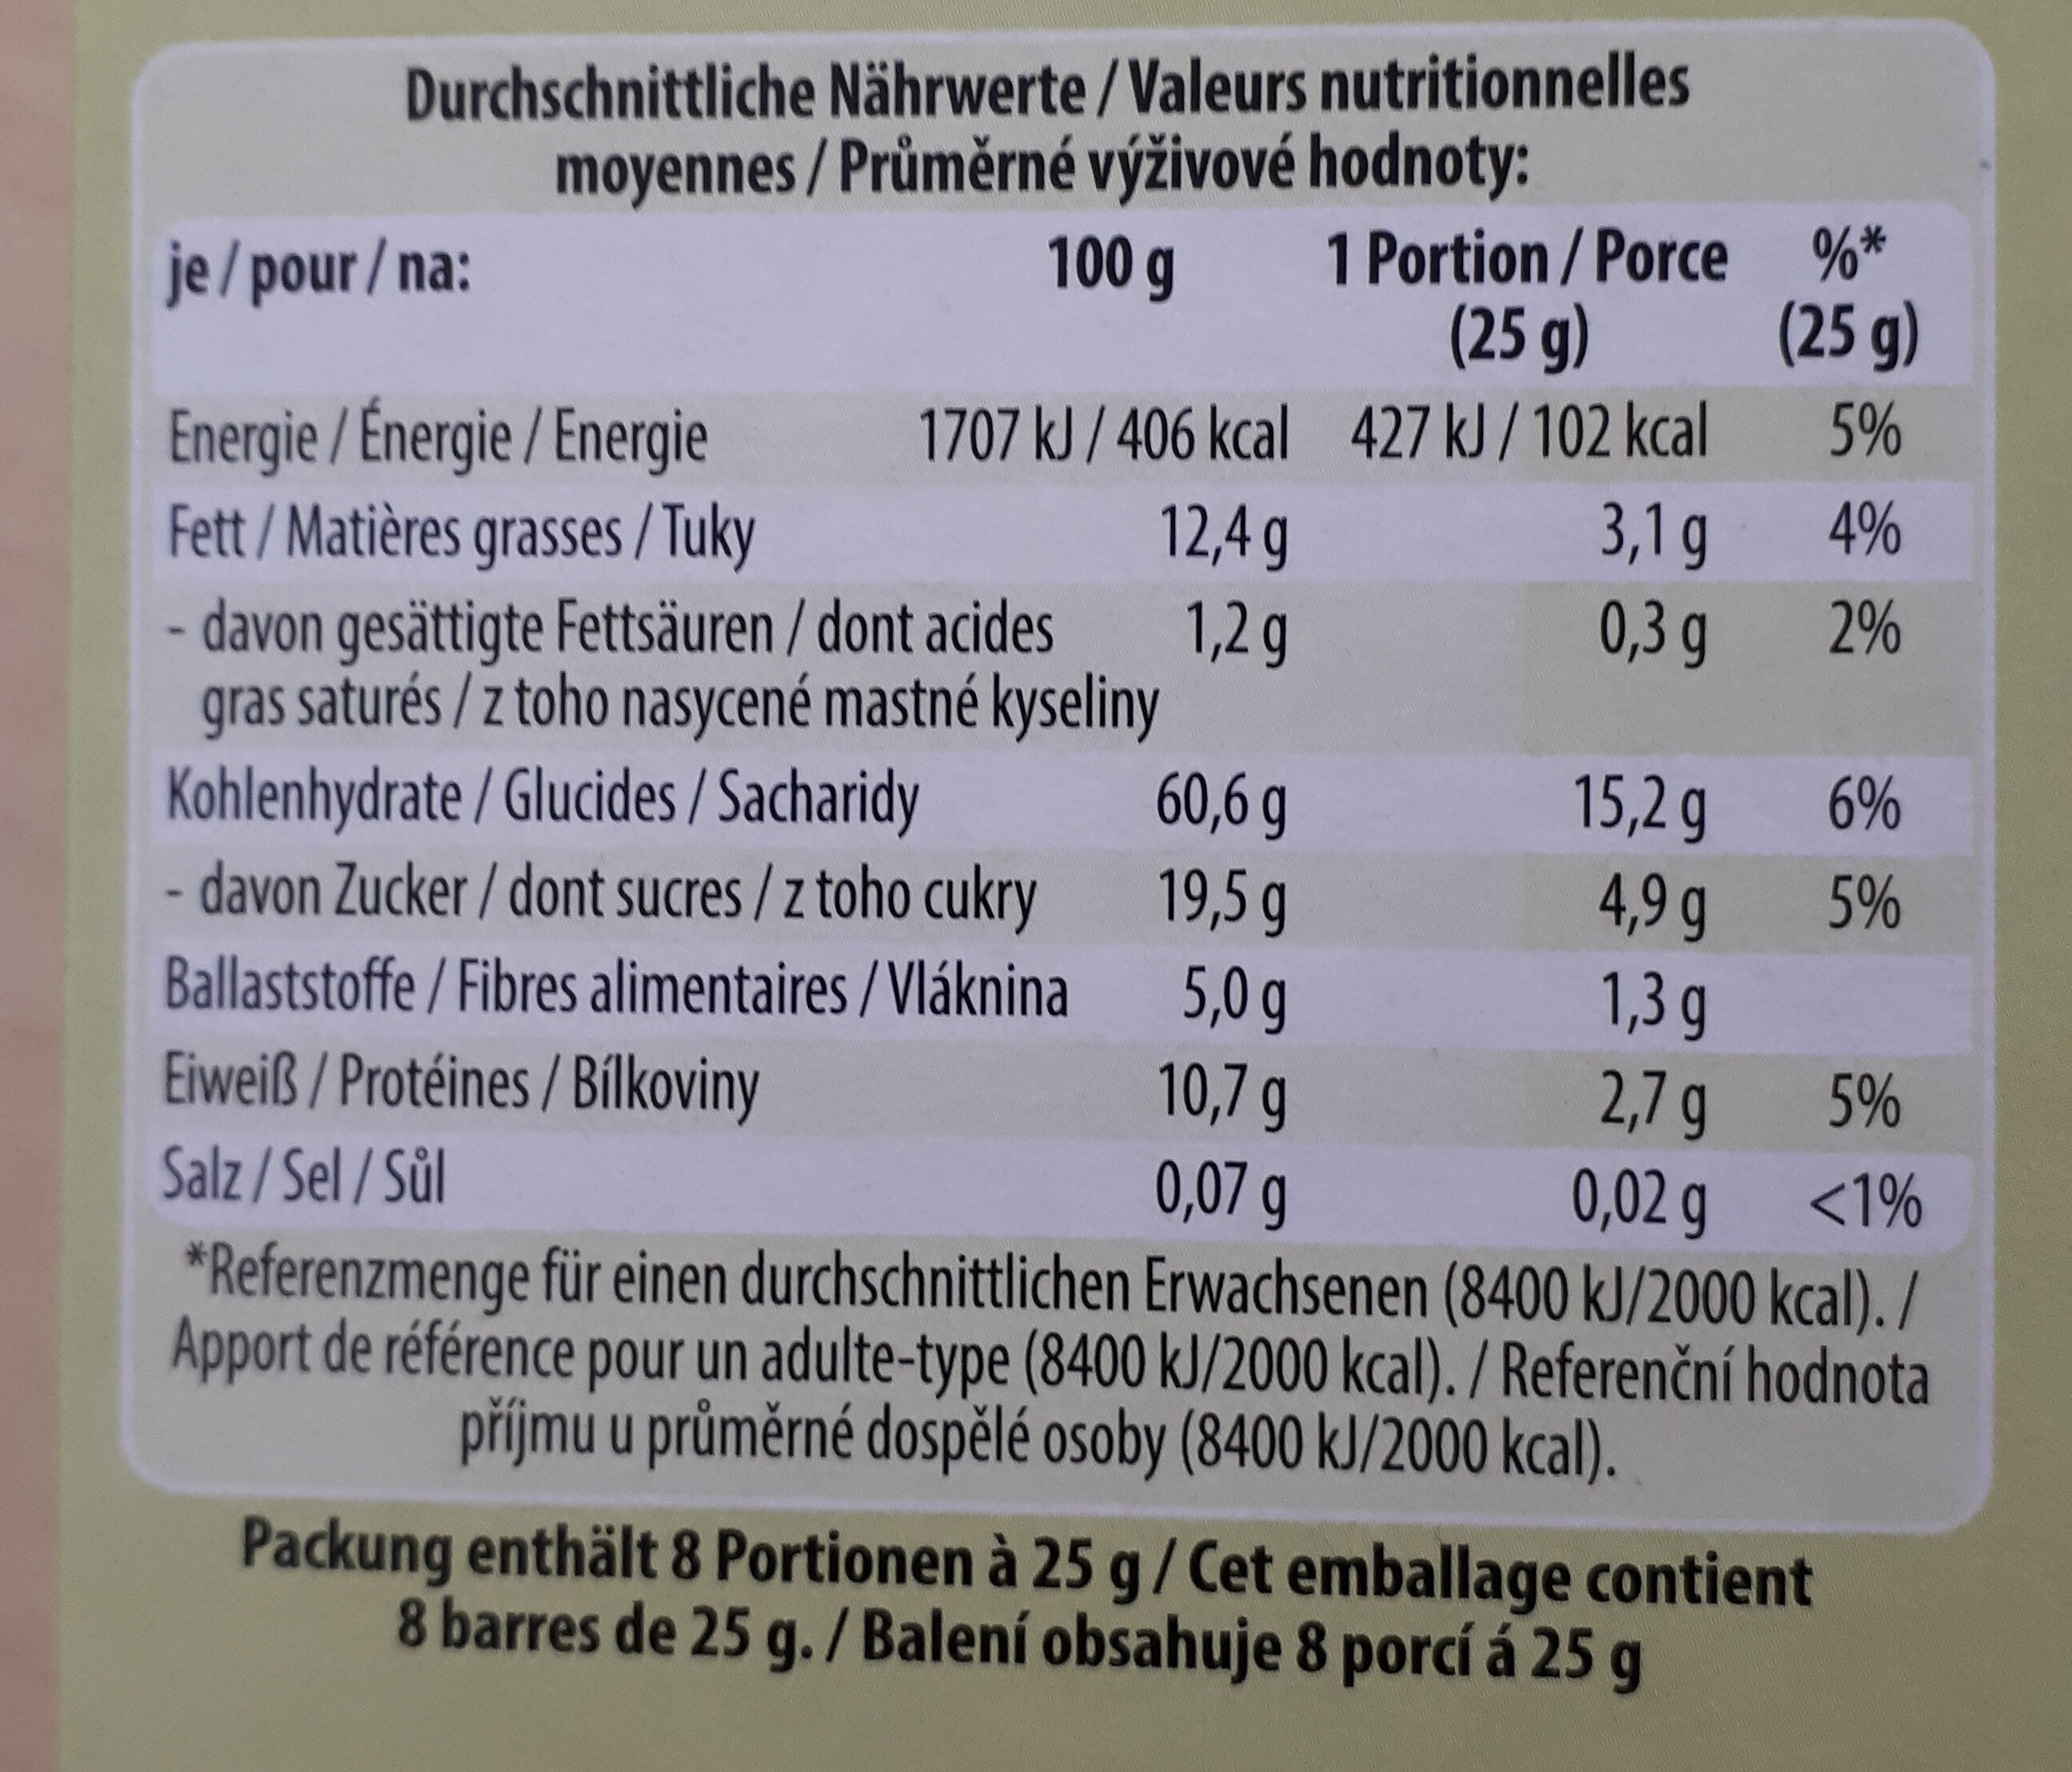

In [34]:
image_list[4]

In [9]:
img_test = image_list[4].convert('L')
img_test = img_test.point(lambda x: 0 if x<100 else 255, '1')
#print(img_test)
text = pytesseract.image_to_string(img_test)

In [10]:
print(text)

Durchschnittliche Nahrwerte / Valeurs nutritionnelles
moyennes / Priimérné vyzivové hodnoty:

je/ pour / na: 100g
Energie / Energie / Energie 1707 kJ / 406 kcal
Fett / Matiéres grasses / Tuky 12,4g

- davon gesattigte Fettsduren / dont acides 1,29
gras saturés / z toho nasycené mastné kyseliny

Kohlenhydrate / Glucides / Sacharidy 60,6 g
- davon Zucker / dont sucres/ztohocukry  19,5g
Ballaststoffe / Fibres alimentaires /Vidknina 5,0q
Eiweifs / Protéines / Bilkoviny 10,7 g
Salz / Sel / Sul 0,07 q

1 Portion / Porce
(25 g)
427k) / 102 kcal
3,19
0,39

15,29
49q
1,34
2,/q

0,02 g

0% *
(25 g)
5%
4%
2%

6%
5%

5%
<1%

“Referenzmenge fur einen durchschnittlichen Erwachsenen (8400 ki/2000 kcal). /
Apport de référence pour un adulte-type (8400 kJ/2000 kcal). / Referenéni hodnota
prijmu u prumerné dospélé osoby (8400 kJ/2000 kcal).

Packung enthait 8 Portionen a 25 g// Cet emballage contient
8 barres de 25 g. / Baleni obsahuje 8 porc/ 4 25 g


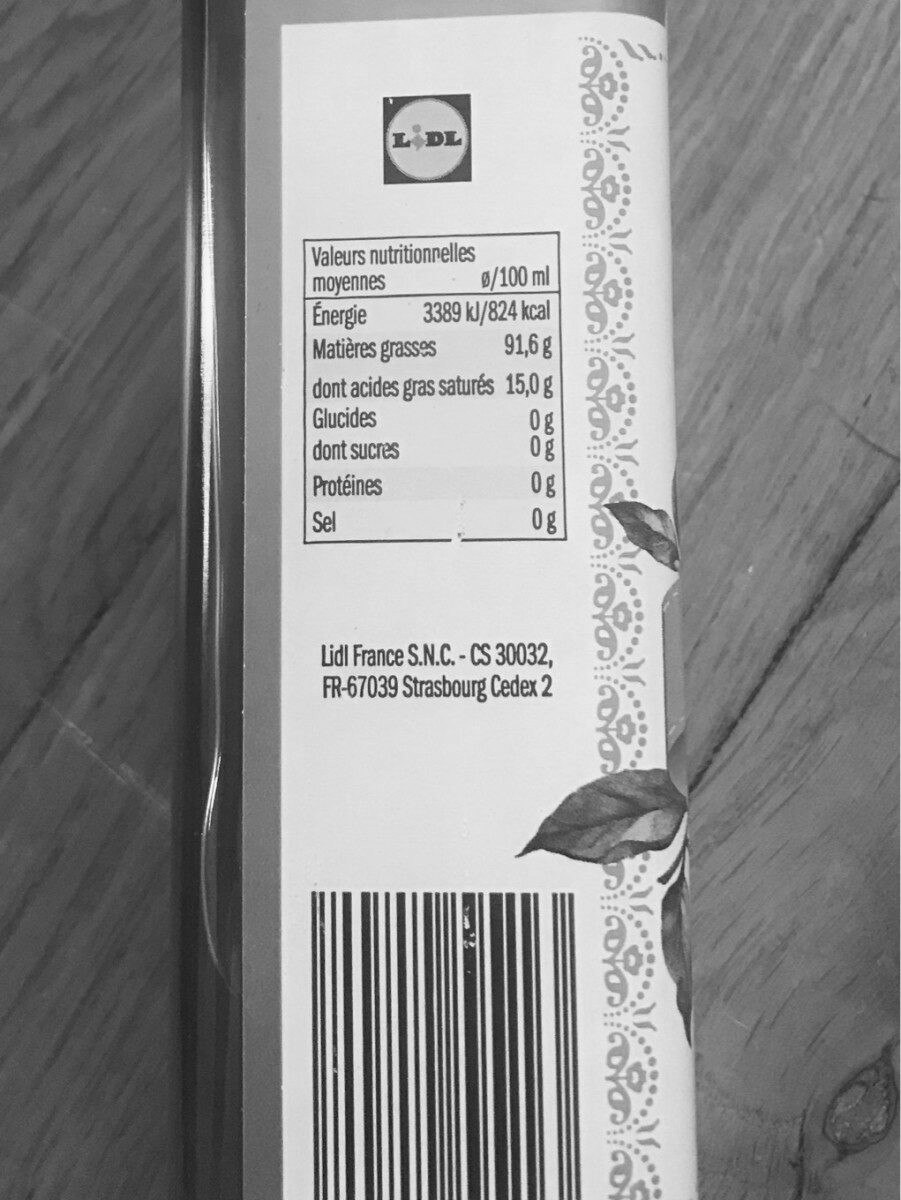

In [11]:
image_list[1].convert('L')

In [44]:
img = cv2.imread('./full_data/20223236.nutrition.cropped.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

In [45]:
import cv2
import numpy as np

img = cv2.imread('./full_data/20223236.nutrition.cropped.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

In [42]:
img = cv2.imread('./full_data/20223236.nutrition.cropped.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#edges = cv2.Canny(gray,50,150,apertureSize = 3)

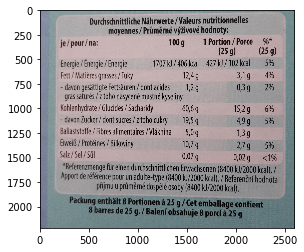

In [43]:
plt.imshow(img)
plt.show()

In [48]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

In [49]:
detect_text('./full_data/20223236.nutrition.cropped.jpg')

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started